# Analisando as todas as proposições de 1998 - 2016

### Os dados utilizados se encontram no portal de dados abertos da Câmara dos Deputados como sendo referentes aos anos de 1998 até 2018, porém, não houve atualização e inserção das informações de 2017 e 2018 ainda.

#### Link do portal: https://dadosabertos.camara.leg.br/swagger/api.html

#### Para esta análise geral foi feito um script em python que une todos os 5 arquivos no formato csv (gerados a partir dos 5 arquivos no formato json disponibilizados no portal de dados abertos) em um só. 

#### Carregamento dos dados:

In [6]:
import pandas as pd

data = pd.read_csv('proposicoes/proposicoes_1998_2016.csv', encoding = 'utf8', header = 0)

## Visão Geral

In [7]:
data.shape

(46341, 57)

#### O arquivo contém, portanto, 46341 linhas com proposições e 56 colunas para cada uma. Três primeiras linhas:

In [8]:
data.head(3)

,Unnamed: 0,COD_ORGAO_ORIGEM,NUM_LEGISLATURA_APRESEN,NUM_LEGISLATURA_LEI,NOM_PARTIDO_POLITICO,DAT_VETO_TOTAL,NOM_UF,DES_TIPO_PROPOSICAO,DES_COMPLETA,COD_TIPO_NORMA_JURIDICA_ORIGEM,...,COD_TIPO_AUTOR_ORIGEM,NUM_SESSAO_LEGISLATIVA_LEI,DAT_FIM_LEGISLATURA_APRESEN,SIG_PARTIDO_POLITICO,IND_ATIVO_TIPO_PROPOSICAO,DAT_INICIO_LEGISLATURA_APRESEN,NUM_PROPOSICAO,COD_TIPO_SESSAO_LEGISLATIVA_LEI,NOM_PARLAMENTAR,DAT_FINAL_RECESSO_APRESEN
0,0,-1,54,-1,PARTIDO DO MOVIMENTO DEMOCRÁTICO BRASILEIRO,NaN,ALAGOAS,PROJETO DE LEI,PROJETO DE LEI,-1,...,TipoParlamentar_10000,-1.0,31-01-2015,PMDB,1,01-02-2011,2429.0,-1.0,JOAQUIM BELTRÃO,01-08-2011
1,1,-1,54,-1,PARTIDO VERDE,NaN,RIO DE JANEIRO,PROJETO DE LEI,PROJETO DE LEI,-1,...,TipoParlamentar_10000,-1.0,31-01-2015,PV,1,01-02-2011,2438.0,-1.0,ALFREDO SIRKIS,01-08-2011
2,2,-1,54,-1,PARTIDO DOS TRABALHADORES,NaN,AMAPÁ,PROPOSTA DE EMENDA À CONSTITUIÇÃO,PROPOSTA DE EMENDA À CONSTITUIÇÃO (ART. 60 CF ...,-1,...,TipoParlamentar_10000,-1.0,31-01-2015,PT,1,01-02-2011,86.0,-1.0,DALVA FIGUEIREDO,01-08-2011


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46341 entries, 0 to 46340
Data columns (total 57 columns):
Unnamed: 0                               46341 non-null int64
COD_ORGAO_ORIGEM                         46341 non-null int64
NUM_LEGISLATURA_APRESEN                  46341 non-null int64
NUM_LEGISLATURA_LEI                      46341 non-null int64
NOM_PARTIDO_POLITICO                     33340 non-null object
DAT_VETO_TOTAL                           110 non-null object
NOM_UF                                   33420 non-null object
DES_TIPO_PROPOSICAO                      46341 non-null object
DES_COMPLETA                             46013 non-null object
COD_TIPO_NORMA_JURIDICA_ORIGEM           46341 non-null int64
SIG_UF                                   33420 non-null object
DAT_FIM_LEGISLATURA_LEI                  10009 non-null object
COD_PROPOSICAO_ORIGEM                    46284 non-null float64
DES_ATIVO_TIPO_PROPOSICAO                46341 non-null object
NOM_ORGAO      

#### Removendo a coluna *Unnamed: 0* pois não é de nosso interesse.

In [10]:
data.drop("Unnamed: 0", axis = 1, inplace = True)
data.shape

(46341, 56)

In [11]:
data.isnull().any()

COD_ORGAO_ORIGEM                         False
NUM_LEGISLATURA_APRESEN                  False
NUM_LEGISLATURA_LEI                      False
NOM_PARTIDO_POLITICO                      True
DAT_VETO_TOTAL                            True
NOM_UF                                    True
DES_TIPO_PROPOSICAO                      False
DES_COMPLETA                              True
COD_TIPO_NORMA_JURIDICA_ORIGEM           False
SIG_UF                                    True
DAT_FIM_LEGISLATURA_LEI                   True
COD_PROPOSICAO_ORIGEM                     True
DES_ATIVO_TIPO_PROPOSICAO                False
NOM_ORGAO                                 True
DES_APELIDO_ORGAO                         True
DATAPRESENTACAOPROPOSICAO                False
DES_TIPO_AUTOR                           False
COD_SEXO                                  True
IND_ATIVO_ORGAO                          False
COD_TIPO_PARLAMENTAR                     False
DES_TIPO_NORMA_JURIDICA                   True
DES_TIPO_SESS

#### Das 56 totais, apenas 20 colunas estão completas, as outras possuem pelo menos uma linha sem informação.

### Veremos agora as relações entre as proposições e as informações de algumas colunas.

## Proposições x Estados

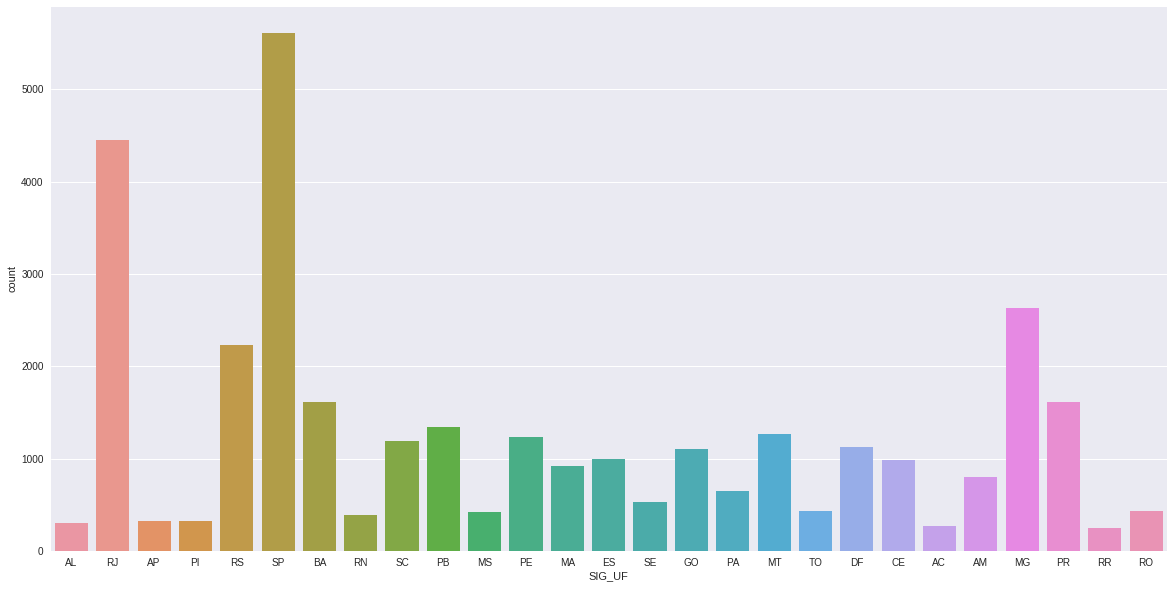

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize']=(20,10)
sns.countplot(data['SIG_UF'], label = "Quantidade")

#### Ranking dos 6 estados com mais proposições e as respectivas quantidades.

In [13]:
uf_list = data['SIG_UF'].tolist()
uf_counter = {}

for word in uf_list:
    if word in uf_counter:
        uf_counter[word] += 1
    else:
        uf_counter[word] = 1
        
popular_uf = sorted(uf_counter, key = uf_counter.get, reverse = True)
top_6 = popular_uf[:7]

for uf in top_6:
    if type(uf)!= float:
        print(uf + ': ' + str(uf_counter[uf]) + ' proposições')
    else:
        print('Sem a informação do estado: ' + str(uf_counter[uf]) + ' proposições')

Sem a informação do estado: 12921 proposições
SP: 5611 proposições
RJ: 4456 proposições
MG: 2636 proposições
RS: 2226 proposições
PR: 1616 proposições
BA: 1612 proposições


#### Quantidade de proposições em cada estado:

In [14]:
uf_counter

{'AL': 297,
 'RJ': 4456,
 'AP': 318,
 'PI': 328,
 'RS': 2226,
 'SP': 5611,
 'BA': 1612,
 'RN': 385,
 'SC': 1195,
 'PB': 1346,
 'MS': 422,
 'PE': 1234,
 'MA': 921,
 'ES': 999,
 'SE': 531,
 'GO': 1100,
 'PA': 643,
 'MT': 1269,
 'TO': 428,
 'DF': 1121,
 'CE': 989,
 'AC': 268,
 'AM': 797,
 'MG': 2636,
 'PR': 1616,
 'RR': 243,
 'RO': 429,
 nan: 12921}

## Proposições x Gênero

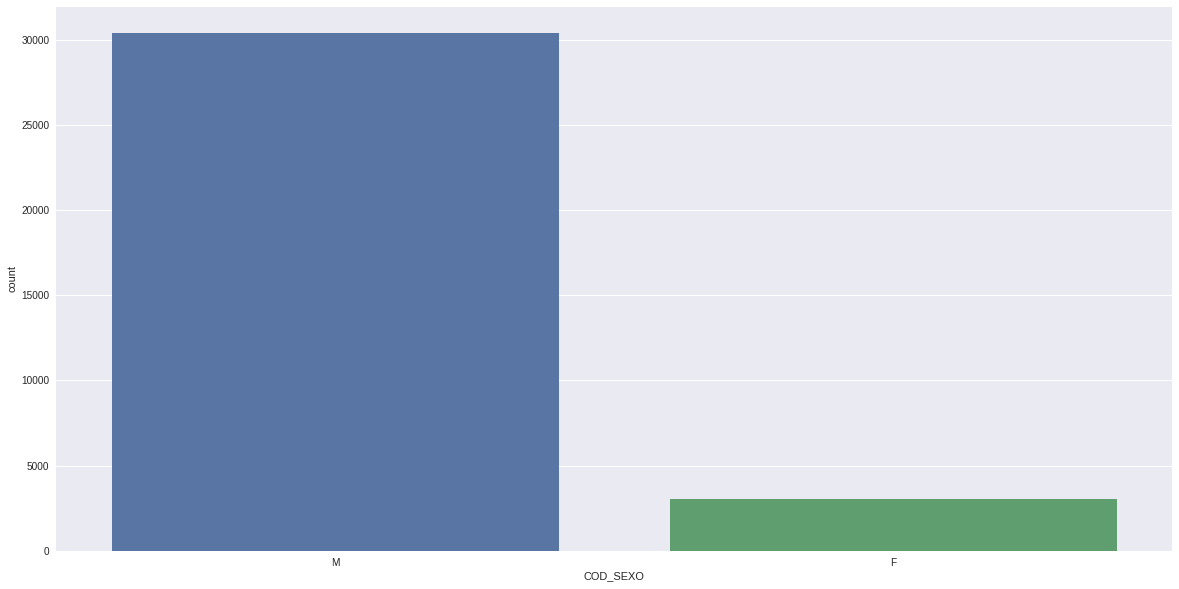

In [15]:
plt.rcParams['figure.figsize']=(20,10)
sns.countplot(data['COD_SEXO'], label = "Quantidade")

In [16]:
gender_list = data['COD_SEXO'].tolist()
gender_counter = {}

for gender in gender_list:
    if gender in gender_counter:
        gender_counter[gender] += 1
    else:
        gender_counter[gender] = 1
        
gender_counter

{'M': 30390, 'F': 3052, nan: 12899}

#### Grande maioria das proposições vieram de homens sendo que 12899 não informam o gênero da pessoa que propôs.

## Proposições x Temas

#### Ranking dos 6 temas mais frequentes nas proposições:

In [17]:
theme_list = data['AREAS_TEMATICAS_APRESENTACAO'].tolist()
theme_counter = {}

for theme in theme_list:
    if theme in theme_counter:
        theme_counter[theme] += 1
    else:
        theme_counter[theme] = 1
        
popular_themes = sorted(theme_counter, key = theme_counter.get, reverse = True)
top_6 = popular_themes[:7]

for theme in top_6:
    print(theme + ': ' + str(theme_counter[theme]) + ' proposições')

COMUNICAÇÕES: 8462 proposições
TRABALHO E EMPREGO: 2454 proposições
ADMINISTRAÇÃO PÚBLICA: 2347 proposições
EDUCAÇÃO: 2072 proposições
TRIBUTAÇÃO: 2056 proposições
DIREITO PENAL E PROCESSUAL PENAL: 1782 proposições
SAÚDE: 1538 proposições


#### Lista com todos os temas e a quantidade de proposições relacionadas a eles entre 1998 e 2016 se encontra em *temas98_16.txt* dentro do diretório *temas* neste mesmo repositório.

## Proposições x Tipo do Autor

#### Ranking dos tipos de autores do mais frequente ao menos frequente:

In [19]:
author_type_list = data['DES_TIPO_AUTOR'].tolist()
author_type_counter = {}

for author_type in author_type_list:
    if author_type in author_type_counter:
        author_type_counter[author_type] += 1
    else:
        author_type_counter[author_type] = 1
        
popular_author_type = sorted(author_type_counter, key = author_type_counter.get, reverse = True)

for author_type in popular_author_type:
    if author_type_counter[author_type] != 1:
        print(author_type + ': ' + str(author_type_counter[author_type]) + ' proposições')
    else:
        print(author_type + ': ' + str(author_type_counter[author_type]) + ' proposição')

DEPUTADO: 33441 proposições
COMISSÃO PERMANENTE: 8836 proposições
ÓRGÃO DO PODER LEGISLATIVO: 2040 proposições
ÓRGÃO DO PODER EXECUTIVO: 1324 proposições
ÓRGÃO DO PODER JUDICIÁRIO: 216 proposições
COMISSÃO DIRETORA: 121 proposições
COMISSÃO PARLAMENTAR DE INQUÉRITO: 115 proposições
COMISSÃO MISTA PERMANENTE: 83 proposições
COMISSÃO ESPECIAL: 65 proposições
MPU - MINISTÉRIO PÚBLICO DA UNIÃO: 41 proposições
COMISSÃO PARLAMENTAR MISTA DE INQUÉRITO: 20 proposições
COMISSÃO MISTA ESPECIAL: 11 proposições
COMISSÃO EXTERNA: 10 proposições
CONSELHO: 6 proposições
DPU - DEFENSORIA PÚBLICA DA UNIÃO: 5 proposições
COMISSÃO PERMANENTE DO SENADO FEDERAL: 2 proposições
SOCIEDADE CIVIL: 2 proposições
ÓRGÃO DO SENADO FEDERAL: 2 proposições
SENADOR: 1 proposição


#### A grande maioria das proposições partem dos deputados.

## Proposições x Ano

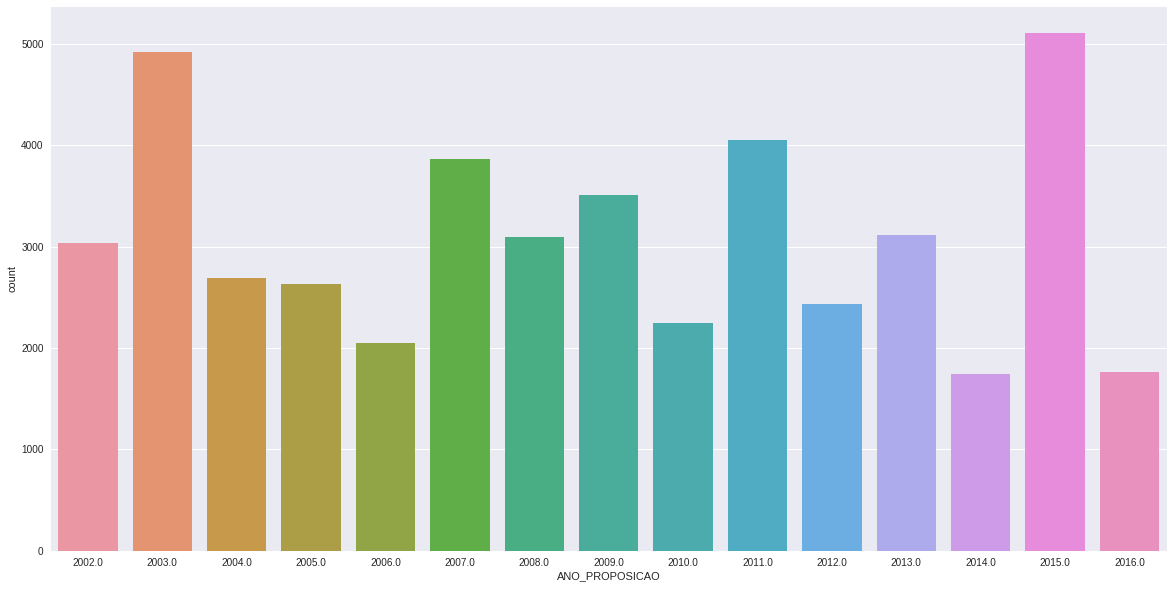

In [20]:
plt.rcParams['figure.figsize']=(20,10)
sns.countplot(data['ANO_PROPOSICAO'], label = "Quantidade")

#### Ranking:

In [21]:
year_list = data['ANO_PROPOSICAO'].tolist()
year_counter = {}

for year in year_list:
    if year in year_counter:
        year_counter[year] += 1
    else:
        year_counter[year] = 1
        
popular_year = sorted(year_counter, key = year_counter.get, reverse = True)

for year in popular_year:
    if year_counter[year] != 1:
        print(str(year) + ': ' + str(year_counter[year]) + ' proposições')

2015.0: 5107 proposições
2003.0: 4922 proposições
2011.0: 4054 proposições
2007.0: 3868 proposições
2009.0: 3509 proposições
2013.0: 3115 proposições
2008.0: 3096 proposições
2002.0: 3040 proposições
2004.0: 2692 proposições
2005.0: 2636 proposições
2012.0: 2433 proposições
2010.0: 2251 proposições
2006.0: 2050 proposições
2016.0: 1764 proposições
2014.0: 1747 proposições


#### 2015 foi o ano até então com mais proposições feitas.

## Proposições x Região

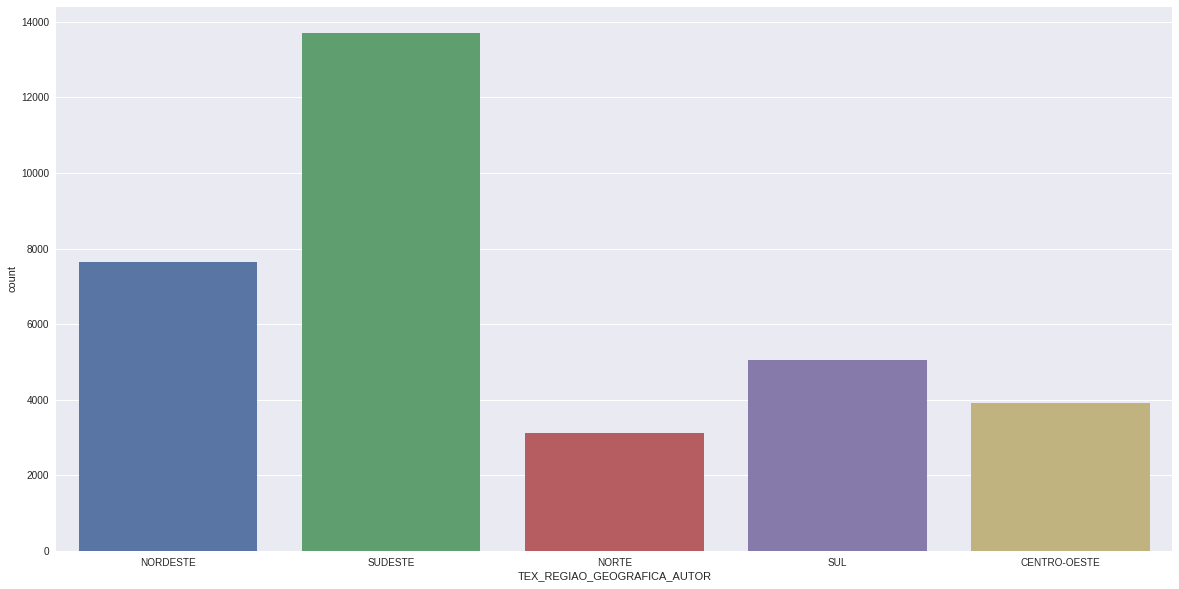

In [22]:
plt.rcParams['figure.figsize']=(20,10)
sns.countplot(data['TEX_REGIAO_GEOGRAFICA_AUTOR'], label = "Quantidade")

#### Ranking:

In [23]:
region_list = data['TEX_REGIAO_GEOGRAFICA_AUTOR'].tolist()
region_counter = {}

for region in region_list:
    if region in region_counter:
        region_counter[region] += 1
    else:
        region_counter[region] = 1
        
popular_region = sorted(region_counter, key = region_counter.get, reverse = True)

for region in popular_region:
    if type(region) != float:
        print(region + ': ' + str(region_counter[region]) + ' proposições')
    else:
        print('Sem informação de região: ' + str(region_counter[region]) + ' proposições')

SUDESTE: 13702 proposições
Sem informação de região: 12921 proposições
NORDESTE: 7643 proposições
SUL: 5037 proposições
CENTRO-OESTE: 3912 proposições
NORTE: 3126 proposições


## Proposições x Tipos

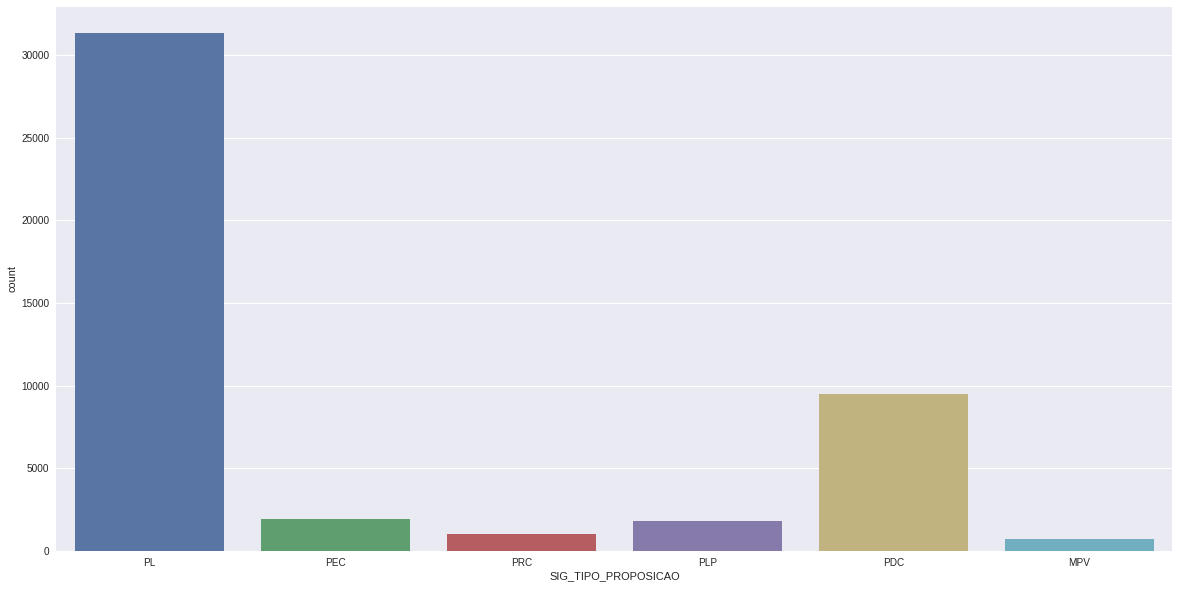

In [24]:
plt.rcParams['figure.figsize']=(20,10)
sns.countplot(data['SIG_TIPO_PROPOSICAO'], label = "Quantidade")

#### Ranking:

In [25]:
proposition_list = data['SIG_TIPO_PROPOSICAO'].tolist()
proposition_counter = {}

for proposition in proposition_list:
    if proposition in proposition_counter:
        proposition_counter[proposition] += 1
    else:
        proposition_counter[proposition] = 1
        
popular_proposition = sorted(proposition_counter, key = proposition_counter.get, reverse = True)

for proposition in popular_proposition:
    print(proposition + ': ' + str(proposition_counter[proposition]) + ' proposições')

PL: 31322 proposições
PDC: 9509 proposições
PEC: 1934 proposições
PLP: 1827 proposições
PRC: 1042 proposições
MPV: 707 proposições


#### Legenda: 

* PL = Projetos de Lei 
* PDC = Projetos de Decreto Legislativo da Câmara
* PLP = Projetos de Lei Complementar
* PEC = Projetos de Emenda à Constituição
* MPV = Medidas Provisórias
* PRC = Projetos de Resolução da Câmara

## Proposições x Partidos Políticos

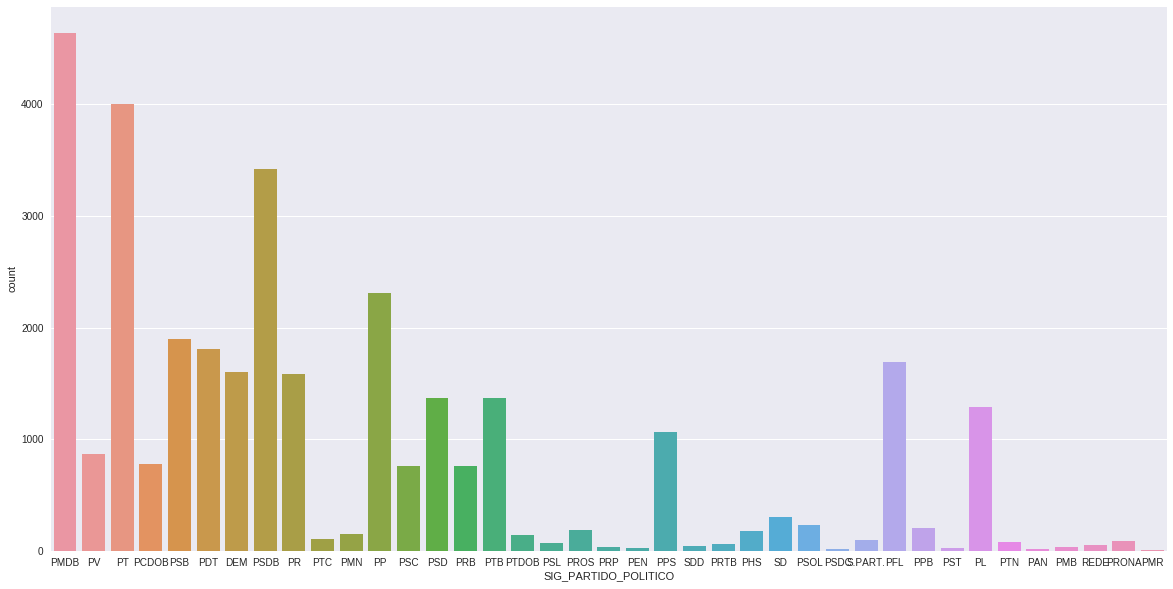

In [26]:
plt.rcParams['figure.figsize']=(20,10)
sns.countplot(data['SIG_PARTIDO_POLITICO'], label = "Quantidade")

#### Ranking dos 6 partidos com mais proposições e as respectivas quantidades:

In [27]:
pp_list = data['SIG_PARTIDO_POLITICO'].tolist()
pp_counter = {}

for pp in pp_list:
    if pp in pp_counter:
        pp_counter[pp] += 1
    else:
        pp_counter[pp] = 1
        
popular_pp = sorted(pp_counter, key = pp_counter.get, reverse = True)
top_7 = popular_pp[:7]

for pp in top_7:
    if type(pp) != float:
        print(pp + ': ' + str(pp_counter[pp]) + ' proposições')
    else:
        print('Sem informação de partido: ' + str(pp_counter[pp]) + ' proposições')

Sem informação de partido: 13001 proposições
PMDB: 4637 proposições
PT: 3999 proposições
PSDB: 3422 proposições
PP: 2308 proposições
PSB: 1893 proposições
PDT: 1807 proposições


#### Lista de todos os partidos e suas respectivas quantidades:

In [28]:
print(pp_counter)

{'PMDB': 4637, 'PV': 870, 'PT': 3999, 'PCDOB': 780, 'PSB': 1893, 'PDT': 1807, 'DEM': 1599, 'PSDB': 3422, 'PR': 1588, 'PTC': 102, 'PMN': 154, 'PP': 2308, 'PSC': 762, 'PSD': 1373, 'PRB': 756, 'PTB': 1365, 'PTDOB': 143, 'PSL': 69, 'PROS': 187, 'PRP': 31, 'PEN': 22, 'PPS': 1068, 'SDD': 41, 'PRTB': 64, 'PHS': 177, 'SD': 307, 'PSOL': 229, 'PSDC': 16, nan: 13001, 'S.PART.': 96, 'PFL': 1692, 'PPB': 200, 'PST': 27, 'PL': 1284, 'PTN': 77, 'PAN': 14, 'PMB': 36, 'REDE': 52, 'PRONA': 87, 'PMR': 6}


## Proposições x Nome do Parlamentar

#### Ranking dos 10 deputados com mais proposições:

In [29]:
name_list = data['NOM_PARLAMENTAR'].tolist()
name_counter = {}

for name in name_list:
    if name in name_counter:
        name_counter[name] += 1
    else:
        name_counter[name] = 1
        
popular_name = sorted(name_counter, key = name_counter.get, reverse = True)
top_10 = popular_name[:11]

for name in top_10:
    if type(name) != float:
        print(name + ': ' + str(name_counter[name]) + ' proposições')
    else:
        print('Sem informação do nome do deputado: ' + str(name_counter[name]) + ' proposições')

Sem informação do nome do deputado: 12899 proposições
CARLOS NADER: 643 proposições
CARLOS BEZERRA: 460 proposições
JOSÉ CARLOS COUTINHO: 327 proposições
ANTONIO CARLOS MENDES THAME: 314 proposições
POMPEO DE MATTOS: 302 proposições
CARLOS SOUZA: 275 proposições
ALBERTO FRAGA: 272 proposições
CLEBER VERDE: 265 proposições
SANDES JÚNIOR: 201 proposições
RÔMULO GOUVEIA: 192 proposições


#### Média de proposições por deputado:

In [30]:
counter = 0
for name in name_counter:
    counter = counter + name_counter[name]
    
print("Média de proposições por deputado: %.2f" % ((counter-12899)/(len(name_counter)-1)))  # 12899 proposições sem nome do deputado (nan)

Média de proposições por deputado: 23.79


#### Lista com todos os deputados e a quantidade de proposições feitas por cada um durante todos os anos de mandato se encontra no arquivo *deputados&qnt_proposicoes_1998_2016.txt* dentro do diretório *deputados&qnt_proposicoes* neste mesmo repositório.